In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/market_cap_top20.csv')
df.head()

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,1,AAPL,Apple Inc.,Technology,Consumer Electronics,USA,2165.05B,29.22,130.21,0.36%,"7,83,39,673"
1,2,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,USA,1880.86B,34.36,252.46,1.09%,"2,69,92,758"
2,3,AMZN,"Amazon.com, Inc.",Consumer Cyclical,Internet Retail,USA,1667.50B,62.64,3291.61,-0.45%,"47,02,758"
3,4,GOOG,Alphabet Inc.,Communication Services,Internet Content & Information,USA,1646.62B,31.97,2398.69,0.73%,"11,61,766"
4,5,GOOGL,Alphabet Inc.,Communication Services,Internet Content & Information,USA,1580.64B,30.38,2351.93,0.62%,"14,44,167"


In [3]:
df['Market Cap'] = df['Market Cap'].str[:-1]
df['Market Cap'] = df['Market Cap'].astype(np.float64)

In [4]:
df['Change'] = df['Change'].str[:-1]
df['Change'] = df['Change'].astype(np.float64)

In [5]:
df['Volume'] = df['Volume'].str.replace(',', '').astype(np.int64)

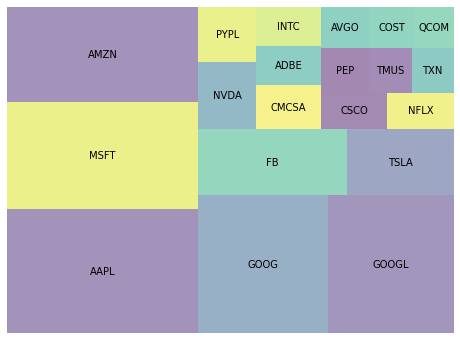

In [6]:
plt.figure(figsize=(8,6))
squarify.plot(df['Market Cap'], label=df.Ticker,alpha=0.5)
plt.axis('off')
plt.show()

In [7]:
cmap = mpl.cm.Reds   #select cmap
#Normalize based on Volume
norm = mpl.colors.Normalize(vmin=df.Volume.min(), 
                                 vmax=df.Volume.max())
#Define colors array
colors = [cmap(norm(i)) for i in df.Volume]

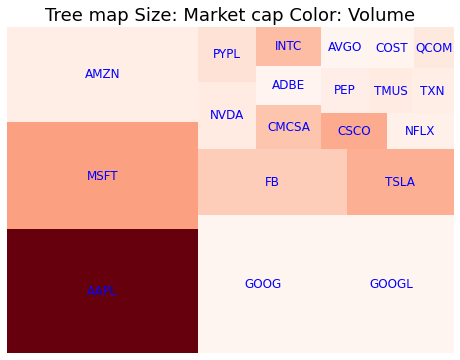

In [8]:
plt.figure(figsize=(8,6))
title = 'Tree map Size: Market cap Color: Volume'
plt.title(title, size=18)
squarify.plot(df['Market Cap'], label=df.Ticker,
              text_kwargs={'color':'blue', 'size':12},
              color=colors)
plt.axis('off')
plt.savefig('fig.png')
plt.show()

In [9]:
cmap = mpl.cm.RdYlGn
norm = mpl.colors.Normalize(vmin=df.Change.min(),
                                 vmax=df.Change.max())
colors = [cmap(norm(i)) for i in df.Change]

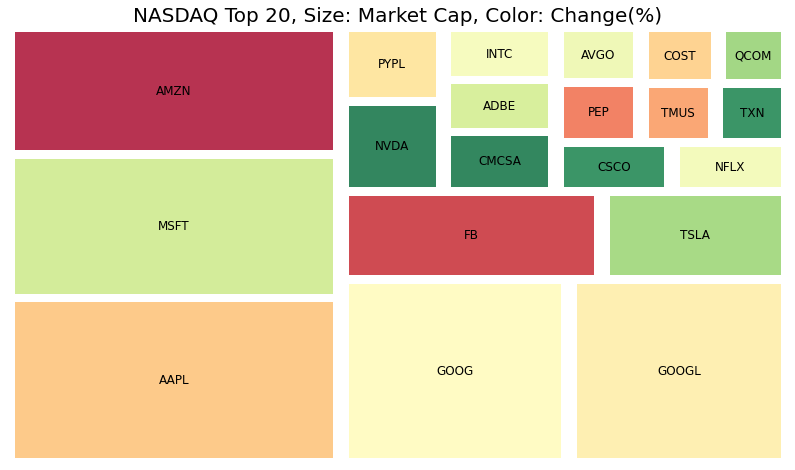

In [10]:
plt.figure(figsize=(14,8))
title = 'NASDAQ Top 20, Size: Market Cap, Color: Change(%)'
plt.title(title, size=20)
squarify.plot(df['Market Cap'], label=df.Ticker,alpha=0.8, color=colors, pad=True, 
              text_kwargs={'color':'black', 'size':12})
plt.axis('off')
plt.show()